In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# read all files
dfs = []
for file in os.listdir("../dataset/dataset/"):
    dfs.append((file.split('.')[0], pd.read_excel(f"../dataset/dataset/{file}")))

In [3]:
for df in dfs:
    print(df[1]['label'].value_counts())

1    2600
0    2600
Name: label, dtype: int64
1    2288
0    2288
Name: label, dtype: int64
1    1872
0    1872
Name: label, dtype: int64
1    2756
0    2756
Name: label, dtype: int64
1    1820
0    1820
Name: label, dtype: int64
1    1456
0    1456
Name: label, dtype: int64
1    1404
0    1404
Name: label, dtype: int64


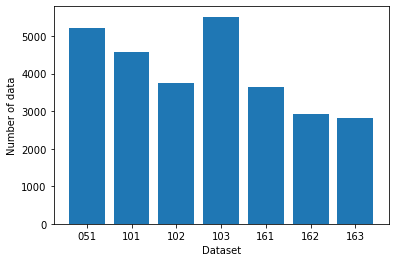

In [4]:
# check data shape
dataset_name = []
shapes = []
for df in dfs:
    dataset_name.append(df[0])
    shapes.append(df[1].shape[0])
plt.bar(dataset_name, shapes)
plt.xlabel('Dataset')
plt.ylabel('Number of data')
plt.show()

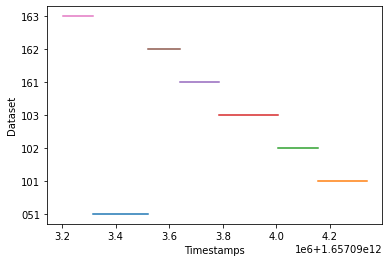

In [5]:
# check timestamp
timestamps = []
dataset_name = []
for df in dfs:
    timestamps.append(df[1].iloc[0]['timestamp'])
    timestamps.append(df[1].iloc[-1]['timestamp'])
    dataset_name.append(df[0])
    dataset_name.append(df[0])
for i in range(0, len(dataset_name), 2):
    plt.plot(timestamps[i:i+2], dataset_name[i:i+2])
plt.xlabel('Timestamps')
plt.ylabel('Dataset')
plt.show()

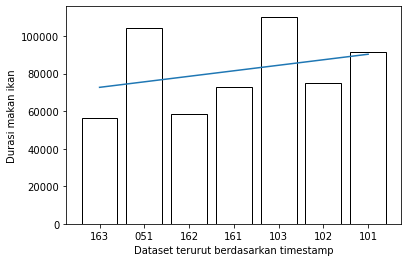

In [6]:
# Regresi dari durasi makan ikan terurut berdasarkan timestamp
durations = []
for df in dfs:
    durations.append((df[1].loc[0, 'timestamp'], df[1][df[1]['label'] == 0].iloc[0]['timestamp'] - df[1][df[1]['label'] == 1].iloc[0]['timestamp'], df[0]))
durations.sort()
timestamps = [[duration[0]] for duration in durations]
dataset = [duration[2] for duration in durations]
durations = [duration[1] for duration in durations]

clf = LinearRegression().fit(timestamps, durations)
regression = clf.predict(timestamps)

plt.bar(dataset, durations, fill=False)
plt.plot(dataset[::6], regression[::6])
plt.xlabel('Dataset terurut berdasarkan timestamp')
plt.ylabel('Durasi makan ikan')
plt.show()

In [7]:
sum(durations)/1000/60

9.464

In [8]:
0.464*60

27.84